# Project: Investigate a Dataset - [Hospital Appointment in Brazil]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset is a collection of hospital appointments for resident(patient) in Brazil, and whether or not this patient show up for their scheduled hospital appointment.
The dataset consist of the following features:
1. PatientID: to identify the patient
2. AppointmentID : to identify the appointment made
3. Gender : Male or Female
4. ScheduledDay : The day the appointment was made
5. AppointmentDay : the day of the appointment itself
6. Age : how old the patient is
7. Scholarship : whether patient was placed on the government social welfare
8. Neighbourhood: the location of the hospital
9. Hypertension : whether patient had hypertension or not
10. Diaetes : whether patient had diaetes or not
11. Alcoholism : whether patient is an alcoholic
12. Handicap : any form of diasability
13. SMS_Received: whether 1 or more message was sent to the patient
14. NO_Show : 'NO' if patient shows up, 'YES' if patient did not show up



### Question(s) for Analysis
1. what is the ratio of patient that show up to those that did not
2. What proportion of patient received sms and turned up
3. Which gender showed up more for appointment
4. Age group that turned up more

In [61]:
# import neede libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


In [62]:
sns.set_style("dark")


In [63]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties


#### Load the dataset and view the first few rows

In [64]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [65]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


#### View the dataset datatype and in the process check for any missing value

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has 110527 rows/entries and 14 columns

The dataset shows no missing value, though some variables are not in the right data type such as Scholarship, hypertension, Diaetes, Alcoholism, Handicap, sms_received, No-show


### Data Cleaning

#### Rename the columns, convert to small letters for ease of typing and reading, correct spelling mistakes, change the  ' - '  into  ' _ '

In [67]:
# create a list of the name I want to change the column names into

column_name = ['patient_id','appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']

In [68]:
df.columns = column_name

In [69]:
df.columns    # check if column names has been changed

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

#### change the data type of some of the columns for easy exploratory analysis and statiscal analysis where possible

The data type of scholarship','hypertension', 'diabetes', 'alcoholism', 'handicap',  should be changed to string since they represent categorical variable and not a numerical variable
       

In [70]:
# use lambda and apply() to change data type of multiple collumns at once and check if it works
col = ['patient_id','appointment_id','scholarship','hypertension', 'diabetes', 'alcoholism', 'handicap']
df[col]= df[col].apply(lambda x: x.astype('str'))
df.dtypes

patient_id         object
appointment_id     object
gender             object
scheduled_day      object
appointment_day    object
age                 int64
neighbourhood      object
scholarship        object
hypertension       object
diabetes           object
alcoholism         object
handicap           object
sms_received        int64
no_show            object
dtype: object

In [71]:
type(df['no_show'][0])

str

In [72]:
type(df['patient_id'][0])

str

In [73]:
type(df['sms_received'][0])

numpy.int64

In [74]:
type(df['scholarship'][0])

str

### check for the unique and nunique values in some of the columns

In [75]:
df[['age','patient_id','appointment_id','scheduled_day','gender','neighbourhood','scholarship','hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received','no_show']].nunique()

age                  104
patient_id         62299
appointment_id    110527
scheduled_day     103549
gender                 2
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
dtype: int64

In [76]:
df['handicap'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

The values shown in the handicap according to the author on kaggle, is the number of 
disability a patient has. 0 is no disability, 1 there is disability though the type is 
unknown,for 2, patient has 2 forms of disability and so on. 

In [77]:
df['neighbourhood'][:5].unique()  # shows the first 5

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI'], dtype=object)

There are about 81 location where hospital/clinic are located where patient booked their appointment 

There are about 62299 unique patients id and 110527 appointment id therefore there might be patients who booked appointment more than once.

### find if there are any duplicates within some columns

In [78]:
df[df.duplicated()]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


There are no duplicated rows, but the output shown earlier, there are 62299 unique value in patient id, therefore there are likely duplicates within this column

In [79]:
sum(df['patient_id'].duplicated())  # get the total number of duplicates within this column

48228

In [80]:
48228 + 62299 == df.shape[0]  # check if the sum of the patient id duplicates and the 
                              # unique values equal to the total number of data entries 

True

In [81]:
df[df['patient_id'].duplicated()].head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
27,1.21548437528e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,19252634865.0,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.24621357937e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.22238323375e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.75657857615e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No


In [82]:
df.query('patient_id in ["2.24621357937e+13","19252634865.0"]')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
153,19252634865.0,5636932,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
154,19252634865.0,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
287,2.24621357937e+13,5532909,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,0,Yes
288,2.24621357937e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
56945,2.24621357937e+13,5688305,M,2016-05-12T07:14:55Z,2016-05-12T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,0,No


The dataframe above shows that some patients booked more than one appointment

In [83]:
df.isna().sum()   # check for null values

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
no_show            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




In [84]:
# get the summary statistics of the dataframe
df.describe()

,age,sms_received
count,110527.000000,110527.000000
mean,37.088874,0.321026
std,23.110205,0.466873
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,1.000000
max,115.000000,1.000000


The minmal age is -1, the maximum age is 115 , the minimum number of message received by patient is 0 ( that such patient did not receive any message), while the maximum number of message received by patient is 1( that is no patient received more than one sms)

for the age, the minimum is -1 which is not a real or feasible age, but according to the author on kaggle, he states -1 is for baby unborn or pregnant women.

In [85]:
df.query('age < 0 ') 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.65943158731e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


further query into this shows only 1 entry for this age , meaning only 1 pregnant woman out of the whole 110527 patient booked an appointment which is not realistic or feasible. i will be dropping this row on account of a possible data entry error

In [86]:
df.drop(index=df.index[99832], 
        axis=0, 
        inplace=True)

In [87]:
df.shape   # check if the row has reduced by 1

(110526, 14)

In [88]:
# get the summary statistics of the dataframe after dropping a row
df.describe()

,age,sms_received
count,110526.000000,110526.000000
mean,37.089219,0.321029
std,23.110026,0.466874
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,1.000000
max,115.000000,1.000000


Now the minimum age is zero years( patient most likely below 1 years old)

### Research Question 1 (what is the ratio of patients that show up to those that did not)

In [89]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

About 88207 patient showed up for the appointment while 22319 did not

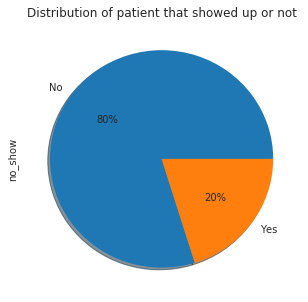

In [90]:
ax = df['no_show'].value_counts().plot(kind='pie', 
                                       figsize=(5,5), 
                                       autopct='%.0f%%',
                                      shadow = True)
ax.set_title('Distribution of patient that showed up or not');

from the chart above, it shows that 80% of patient (aout 88207 patient) who booked an appointment showed up for the appointment. That is for every 1 appointment that was missed, 4 appointment was met

### Create functions to be used in the following analysis

In [91]:
def cross_table(x,y):
    """
    Returns a 2 by 2 table of two variables,
    which is a ratio of an individual entry divided
    by total sum of all entries in the table.
    x = variable1
    y = variable2
    """
    table = pd.crosstab(df[x],df[y], normalize=True)#*100
    return table.apply(lambda t:round(t,3))

In [92]:
def bar_plot(x):
    """
    Returns a bar plot of x, x being 
    a 2 by 2 table of two variables.
    y axis is in %
    x axis represent the categorical 
    variable
    """
    x = x.apply(lambda y:y*100 )
    return x.plot(kind='bar',rot=0)

### Research Question 2 (What proportion of patient received sms and turned up)

In [93]:
pd.crosstab(df['no_show'], df['sms_received'])  # shows the number of patient in each group

sms_received,0,1
no_show,,
No,62509,25698
Yes,12535,9784


In [94]:
sms_table = cross_table('no_show','sms_received') # depicts similar as first table,but shows
                                                 # it as a percentage of each group to the
sms_table.style.format('{:.1%}')                 # whole patient population.

sms_received,0,1
no_show,,
No,56.6%,23.3%
Yes,11.3%,8.9%


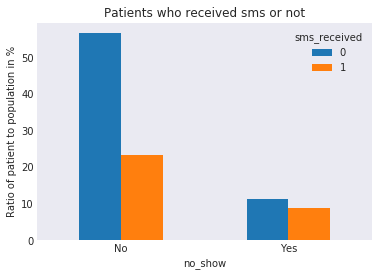

In [95]:
sms_bar = bar_plot(sms_table)
plt.ylabel('Ratio of patient to population in %')
plt.title('Patients who received sms or not');

About 32.2%(35482) of patient population received sms to remind them of their appointment, 
in which 23.3% of that population showed up, were as 67.9% did not receive sms.

### Research Question 3  (Which gender showed up more for appointment)

In [96]:
pd.crosstab(df['no_show'], df['gender']) 

gender,F,M
no_show,,
No,57245,30962
Yes,14594,7725


In [97]:
gender_table = cross_table('no_show','gender')                                                                                        
gender_table.style.format('{:.1%}')

gender,F,M
no_show,,
No,51.8%,28.0%
Yes,13.2%,7.0%


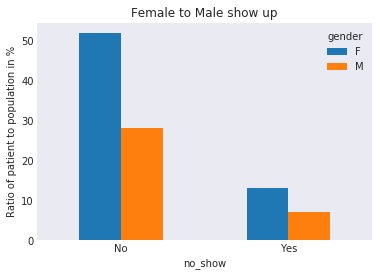

In [98]:
gender_bar = bar_plot(gender_table)
plt.ylabel('Ratio of patient to population in %')
plt.title('Female to Male show up');

From the table above it shows female patient showed up more for appointment, this maybe due to the fact that females booked more appointments

### Research Question 4 (Age group that turned up more)

Create age group consisting of 9 bins starting from zero, each bin consist of 13 age groups except for the last age group which has 11 age groups within it. 

In [99]:
age_groups = pd.cut(df['age'], bins=[0,13,26,39,52,65,78,91,104,np.inf])

Add age_groups as a new column to the original no_show dataframe

In [100]:
df['age_group'] = age_groups

Check the dataframe to inspect whether the age_group column is well inserted into the dataframe.

In [101]:
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,2.98724998243e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,"(52.0, 65.0]"
1,5.58997776694e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,"(52.0, 65.0]"
2,4.26296229995e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,"(52.0, 65.0]"


In [102]:
df.tail(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
110524,1.55766317299e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,"(13.0, 26.0]"
110525,9.21349314356e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,"(26.0, 39.0]"
110526,3.77511518121e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No,"(52.0, 65.0]"


The above analysis shows the age_group column is well inserted into the dataframe

The following table shows the number of patient within each age group against patient turn up. The next table depicts similar observation represented in percentage of patient to the whole population.

In [103]:
pd.crosstab(df['no_show'],df['age_group'])   

age_group,"(0.0, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]","(52.0, 65.0]","(65.0, 78.0]","(78.0, 91.0]","(91.0, 104.0]","(104.0, inf]"
no_show,,,,,,,,,
No,14629,13223,15108,15384,15728,8093,2949,191,2
Yes,3971,4520,4291,3751,3081,1455,562,46,3


In [104]:
age_table = cross_table('no_show','age_group')
age_table.style.format('{:.1%}')

age_group,"(0.0, 13.0]","(13.0, 26.0]","(26.0, 39.0]","(39.0, 52.0]","(52.0, 65.0]","(65.0, 78.0]","(78.0, 91.0]","(91.0, 104.0]","(104.0, inf]"
no_show,,,,,,,,,
No,13.7%,12.4%,14.1%,14.4%,14.7%,7.6%,2.8%,0.2%,0.0%
Yes,3.7%,4.2%,4.0%,3.5%,2.9%,1.4%,0.5%,0.0%,0.0%


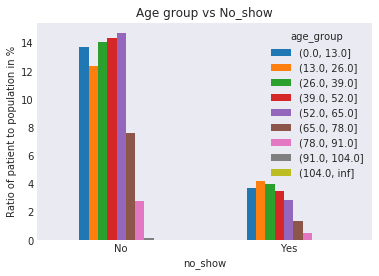

In [105]:
age_bar = bar_plot(age_table)
plt.ylabel('Ratio of patient to population in %')
plt.title('Age group vs No_show');

From the analysis above it shows patient within the age group [52-65] about 14.7% of the patient population turned up more for appointment followed by [39-52] with the least turn up from [>104].

I preferred the bar plot as against 'barh' on account of the above being more aesthetically appealing

<a id='conclusions'></a>
## Conclusions


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

From the analysis of the No_show data, the following were observed:

1. There both old and very young making appointment, with the oldest being 115 years old and the youngest being 0 years old.
2. Greater proportion of appointment scheduled were kept, that a larger proportion of patient kept their appointment
3. SMS sent to a minor proportion of patient, and there does not seem to be a distinct effect of sms on patient turn up
4. Greater proportion of appointment scheduled and appointment honoured were by the female population.
5. The age group with the least scheduled appointment and appointment honoured were > 104 years old, which might be due to smaller population within this age group or decreased motility due to old age

None the less further exploration can still be made in the following areas:

1. Which neighbourhood has the highest and lowest appointment scheduled and appointment kept
2. Does being on scholarship have any positive impacton patient turn up
3. To what extent does disability affect scheduling an appointment and keeping it

### Limitation
* poor and inadequate analysis to show the relationship between the various variables

### Resources
* The dataset used is the No_show, which compiled various information about patient's hospital appointment in Brazil
* https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/41457
* https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
* https://riptutorial.com/pandas/example/5965/grouping-numbers

In [106]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0